In [1]:
import numpy as np
%matplotlib notebook
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation

In [17]:

def do_timestep(u0, D, dt,dx, dy):
    # Propagate with forward-difference in time, central-difference in space
    u = np.zeros_like(u0)
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx**2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy**2 )

    u0 = u.copy()
    return u0

In [18]:
class DiffusableGrid(object):
    def __init__(self, xlim, ylim, diffusability):
        self.grid = np.zeros(shape = (xlim, ylim))
        self.v = diffusability
        self.dt = 1
        self.dx = 1
        self.dy = 1


    def get_pt(self, x, y):
        return self.grid[y][x]
    
    def set_pt(self, x, y, new_pt):
        self.grid[y][x] = new_pt
        
    def print_self(self):
        for y in self.grid[::-1]:
            print(y)
    
    def diffuse(self):
        self.grid = do_timestep(self.grid, self.v, self.dt, self.dx, self.dy)
        
    def show_self(self): 
        plt.imshow(self.grid[::-1],cmap='hot', interpolation='nearest')
        plt.show()

In [19]:
plt.ion()

<IPython.core.display.Javascript object>


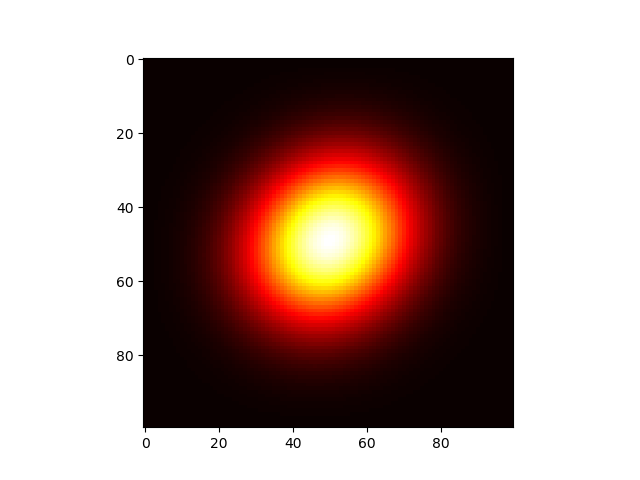

KeyboardInterrupt: 

In [21]:
z = DiffusableGrid(100, 100, 0.2)

z.set_pt(55,55, 10) 
z.set_pt(45,45, 10) 
#z.set_pt(16,16, 10) 

figure = plt.gcf()
figure.canvas.draw()
figure.show()

grids = []

for t in range(20000):
    z.diffuse()
    grids.append(z.grid[::-1])

for grid in grids[::4]:
    plt.imshow(grid,cmap='hot', interpolation='nearest')
    figure.canvas.draw() 
    figure.show()
    time.sleep(0.00001)


In [ ]:
plt.close()